In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats
import numpy as np
from sklearn import datasets
import pandas as pd

In [2]:
filepath = "Net_generation_for_electric_power.csv"
data = pd.read_csv(filepath)
data.dropna(inplace=True)

columns = []
for col in data.columns:
    columns.append(col)
#New dataframe with only years from 2010 - 2020
data = data[['description', 'units', 'source key','Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10', 'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10', 'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11', 'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11', 'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12', 'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-12', 'Jan-13', 'Feb-13', 'Mar-13', 'Apr-13', 'May-13', 'Jun-13', 'Jul-13', 'Aug-13', 'Sep-13', 'Oct-13', 'Nov-13', 'Dec-13', 'Jan-14', 'Feb-14', 'Mar-14', 'Apr-14', 'May-14', 'Jun-14', 'Jul-14', 'Aug-14', 'Sep-14', 'Oct-14', 'Nov-14', 'Dec-14', 'Jan-15', 'Feb-15', 'Mar-15', 'Apr-15', 'May-15', 'Jun-15', 'Jul-15', 'Aug-15', 'Sep-15', 'Oct-15', 'Nov-15', 'Dec-15', 'Jan-16', 'Feb-16', 'Mar-16', 'Apr-16', 'May-16', 'Jun-16', 'Jul-16', 'Aug-16', 'Sep-16', 'Oct-16', 'Nov-16', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17', 'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17', 'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18', 'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20', 'Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20']].copy()
data.head()

,description,units,source key,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20
2,United States : all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.M,348128,307994,299571,276121,315656,362985,396195,...,294084,264054,291979,340019,400737,386013,321755,301722,290110,331059
3,United States : coal,thousand megawatthours,ELEC.GEN.COW-US-98.M,171660,151461,142665,125615,141669,163912,177778,...,50145,40189,46094,64920,89368,90814,67978,59440,60896,78215
4,United States : petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.M,3073,1156,1202,1151,1776,2591,2886,...,671,597,664,819,916,883,758,861,761,868
5,United States : petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.M,1038,1010,1097,958,1025,1202,1313,...,635,560,546,757,775,725,412,278,589,689
6,United States : natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.M,66847,59556,56492,58124,66862,85033,106961,...,114766,100048,107853,134669,176293,164758,133123,123640,100783,116315


In [3]:
#New dataframe remove units & source key
df_data = data.copy()
to_drop = ['units', 'source key']
df_data.drop(to_drop, inplace=True, axis=1)

In [4]:
#Show new dataframe
df_data = df_data.reset_index()
df_data.drop(['index'], inplace=True, axis=1)
df_data

,description,Jan-10,Feb-10,Mar-10,Apr-10,May-10,Jun-10,Jul-10,Aug-10,Sep-10,...,Mar-20,Apr-20,May-20,Jun-20,Jul-20,Aug-20,Sep-20,Oct-20,Nov-20,Dec-20
0,United States : all fuels (utility-scale),348128,307994,299571,276121,315656,362985,396195,394651,333057,...,294084,264054,291979,340019,400737,386013,321755,301722,290110,331059
1,United States : coal,171660,151461,142665,125615,141669,163912,177778,175848,147157,...,50145,40189,46094,64920,89368,90814,67978,59440,60896,78215
2,United States : petroleum liquids,3073,1156,1202,1151,1776,2591,2886,2352,1608,...,671,597,664,819,916,883,758,861,761,868
3,United States : petroleum coke,1038,1010,1097,958,1025,1202,1313,1023,1000,...,635,560,546,757,775,725,412,278,589,689
4,United States : natural gas,66847,59556,56492,58124,66862,85033,106961,112961,85498,...,114766,100048,107853,134669,176293,164758,133123,123640,100783,116315
5,United States : other gases,275,247,275,273,279,265,267,249,240,...,288,150,161,133,162,303,297,238,306,337
6,United States : nuclear,72569,65245,64635,57611,66658,68301,71913,71574,69371,...,63997,59170,64338,67205,69385,68982,65727,59362,61760,69871
7,United States : conventional hydroelectric,22207,20421,20691,18898,24903,29711,24405,20019,17188,...,23483,22002,30367,28950,27571,23985,19076,18237,21736,22981
8,United States : other renewables,10480,8756,12300,13286,12349,11851,10637,10624,10832,...,39791,41036,41698,42492,36307,35692,34314,39494,43050,41486
9,United States : wind,6853,5431,8588,9763,8696,8048,6723,6685,7104,...,29496,29386,28282,29446,22186,22341,22977,28770,33582,32329


In [5]:
#Massage the data using pandas.melt()
#description is id_vars and each month is value_vars
#pd.melt(df_data, id_vars=['description'], value_vars=[''])
columns_name = df_data.columns.values.tolist()
columns_name.remove(columns_name[0])
value_vars=columns_name
id_vars='description'

data = pd.melt(df_data, id_vars=['description'], value_vars=value_vars).drop(columns=['variable'])
data = data.replace('--', 0)
data = data.replace('NM', 0)
data["value"] = pd.to_numeric(data["value"], downcast="float")
data = data.rename(columns={'description':'Power Source', 'value': 'Energy Production (Thousand Megawatthours)'})

In [6]:
data = data.loc[data['Power Source'].str.contains('United States')]
data

,Power Source,Energy Production (Thousand Megawatthours)
0,United States : all fuels (utility-scale),348128.0
1,United States : coal,171660.0
2,United States : petroleum liquids,3073.0
3,United States : petroleum coke,1038.0
4,United States : natural gas,66847.0
...,...,...
5781,United States : all solar,0.0
5782,United States : small-scale solar photovoltaic,0.0
5783,United States : all utility-scale solar,5338.0
5784,United States : utility-scale photovoltaic,5246.0


In [7]:
#list of power source names
power_source_names = data['Power Source'].unique().tolist()
len(power_source_names)


19

<AxesSubplot:title={'center':'Energy Production (Thousand Megawatthours)'}, xlabel='Power Source'>

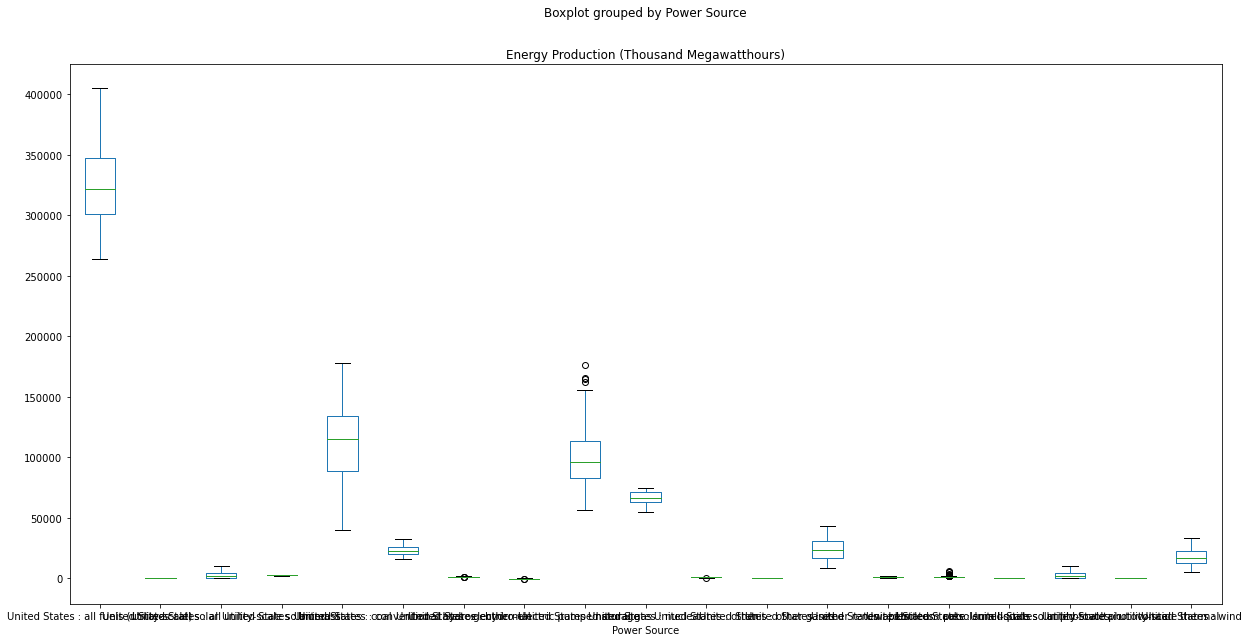

In [8]:
#ANOVA sample variance between means of each power-source
data.boxplot(column='Energy Production (Thousand Megawatthours)', by='Power Source', figsize=(20,10), grid=False)

In [9]:
#Drop california power-sources from dataframe


#Extract individual groups for U.S. power-sources U.S total groups: 19

def extract(power_source):
    
    pop = data[data['Power Source']==power_source]['Energy Production (Thousand Megawatthours)']
    pop
    return pop
    
    return group

#group1 = extract(power_source_names[0])
group2 = extract(power_source_names[1])
group3 = extract(power_source_names[2])
group4 = extract(power_source_names[3])
group5 = extract(power_source_names[4])
group6 = extract(power_source_names[5])
group7 = extract(power_source_names[6])
group8 = extract(power_source_names[7])
group9 = extract(power_source_names[8])
group10 = extract(power_source_names[9])
group11 = extract(power_source_names[10])
group12 = extract(power_source_names[11])
group13 = extract(power_source_names[12])
group14 = extract(power_source_names[13])
group15 = extract(power_source_names[14])
group16 = extract(power_source_names[15])
group17 = extract(power_source_names[16])
group18 = extract(power_source_names[17])
group19 = extract(power_source_names[18])


In [10]:
#ANOVA Test
stats.f_oneway(group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12, group13, group14, group15, group16, group17, group18, group19)


F_onewayResult(statistic=2070.1725078577947, pvalue=0.0)